# Predict Wine Quality Using Linear Regression

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing and Loading Dataset
df=pd.read_csv('winequalityDataset.csv',sep=";")

In [3]:
# Displaying top 5 rows
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
# Displaying last 5 rows
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [5]:
# Displaying Number of rows and number of columns fro
df.shape

(4898, 12)

In [6]:
# Display the random 5 rows of Dataset
df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2952,6.1,0.270,0.25,1.80,0.041,9.0,109.0,0.99290,3.08,0.54,9.0,5
1413,8.1,0.290,0.49,7.10,0.042,22.0,124.0,0.99440,3.14,0.41,10.8,6
685,6.2,0.360,0.26,13.20,0.051,54.0,201.0,0.99760,3.25,0.46,9.0,5
2636,7.2,0.240,0.27,11.40,0.034,40.0,174.0,0.99773,3.20,0.44,9.0,5
4707,5.6,0.205,0.16,12.55,0.051,31.0,115.0,0.99564,3.40,0.38,10.8,6


In [7]:
# Describing the statistical values of Dataset
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [8]:
# Displays the information of the dataset
# info() is used to check the information about the data and datatypes of each respective attribute
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


# Handling Missing Data

In [9]:
# Checking whether there is any missing data in any column
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Checking and Removing Duplicate values

In [10]:
print(" Total rows and columns including dupliacte values :")
df.shape

 Total rows and columns including dupliacte values :


(4898, 12)

In [11]:
duplicate=df.duplicated()
print(" Total Duplicate Values in dataset are :" , duplicate.sum() , " \n\n")
print("Duplicate values are :")
df[duplicate]

 Total Duplicate Values in dataset are : 937  


Duplicate values are :


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,6
20,6.2,0.66,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.800000,8
...,...,...,...,...,...,...,...,...,...,...,...,...
4828,6.4,0.23,0.35,10.3,0.042,54.0,140.0,0.99670,3.23,0.47,9.200000,5
4850,7.0,0.36,0.35,2.5,0.048,67.0,161.0,0.99146,3.05,0.56,11.100000,6
4851,6.4,0.33,0.44,8.9,0.055,52.0,164.0,0.99488,3.10,0.48,9.600000,5
4856,7.1,0.23,0.39,13.7,0.058,26.0,172.0,0.99755,2.90,0.46,9.000000,6


In [12]:
# Using drop_dupliactes() we can remove the duplicates and assign it back to dataframe
df.drop_duplicates(inplace=True)

In [13]:

df.shape

(3961, 12)

# Coorelation Matrix

In [14]:
# Displaying the coorelation Matrix
# Coorealtion Matrix means the diagonal value will always be one .
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.019214,0.298959,0.083620,0.024036,-0.058396,0.082425,0.266091,-0.431274,-0.017453,-0.110788,-0.124636
volatile acidity,-0.019214,1.000000,-0.163228,0.098340,0.086287,-0.102471,0.102315,0.060603,-0.046954,-0.021150,0.046815,-0.190678
citric acid,0.298959,-0.163228,1.000000,0.106269,0.132590,0.091681,0.122845,0.160076,-0.183015,0.049442,-0.076514,0.007065
residual sugar,0.083620,0.098340,0.106269,1.000000,0.076091,0.306835,0.409583,0.820498,-0.165997,-0.020503,-0.398167,-0.117339
chlorides,0.024036,0.086287,0.132590,0.076091,1.000000,0.101272,0.191145,0.253088,-0.090573,0.017871,-0.356928,-0.217739
free sulfur dioxide,-0.058396,-0.102471,0.091681,0.306835,0.101272,1.000000,0.619437,0.294638,-0.007750,0.037932,-0.251768,0.010507
total sulfur dioxide,0.082425,0.102315,0.122845,0.409583,0.191145,0.619437,1.000000,0.536868,0.008239,0.136544,-0.446643,-0.183356
density,0.266091,0.060603,0.160076,0.820498,0.253088,0.294638,0.536868,1.000000,-0.063734,0.082048,-0.760162,-0.337805
pH,-0.431274,-0.046954,-0.183015,-0.165997,-0.090573,-0.007750,0.008239,-0.063734,1.000000,0.142353,0.093095,0.123829
sulphates,-0.017453,-0.021150,0.049442,-0.020503,0.017871,0.037932,0.136544,0.082048,0.142353,1.000000,-0.022850,0.053200


<Axes: >

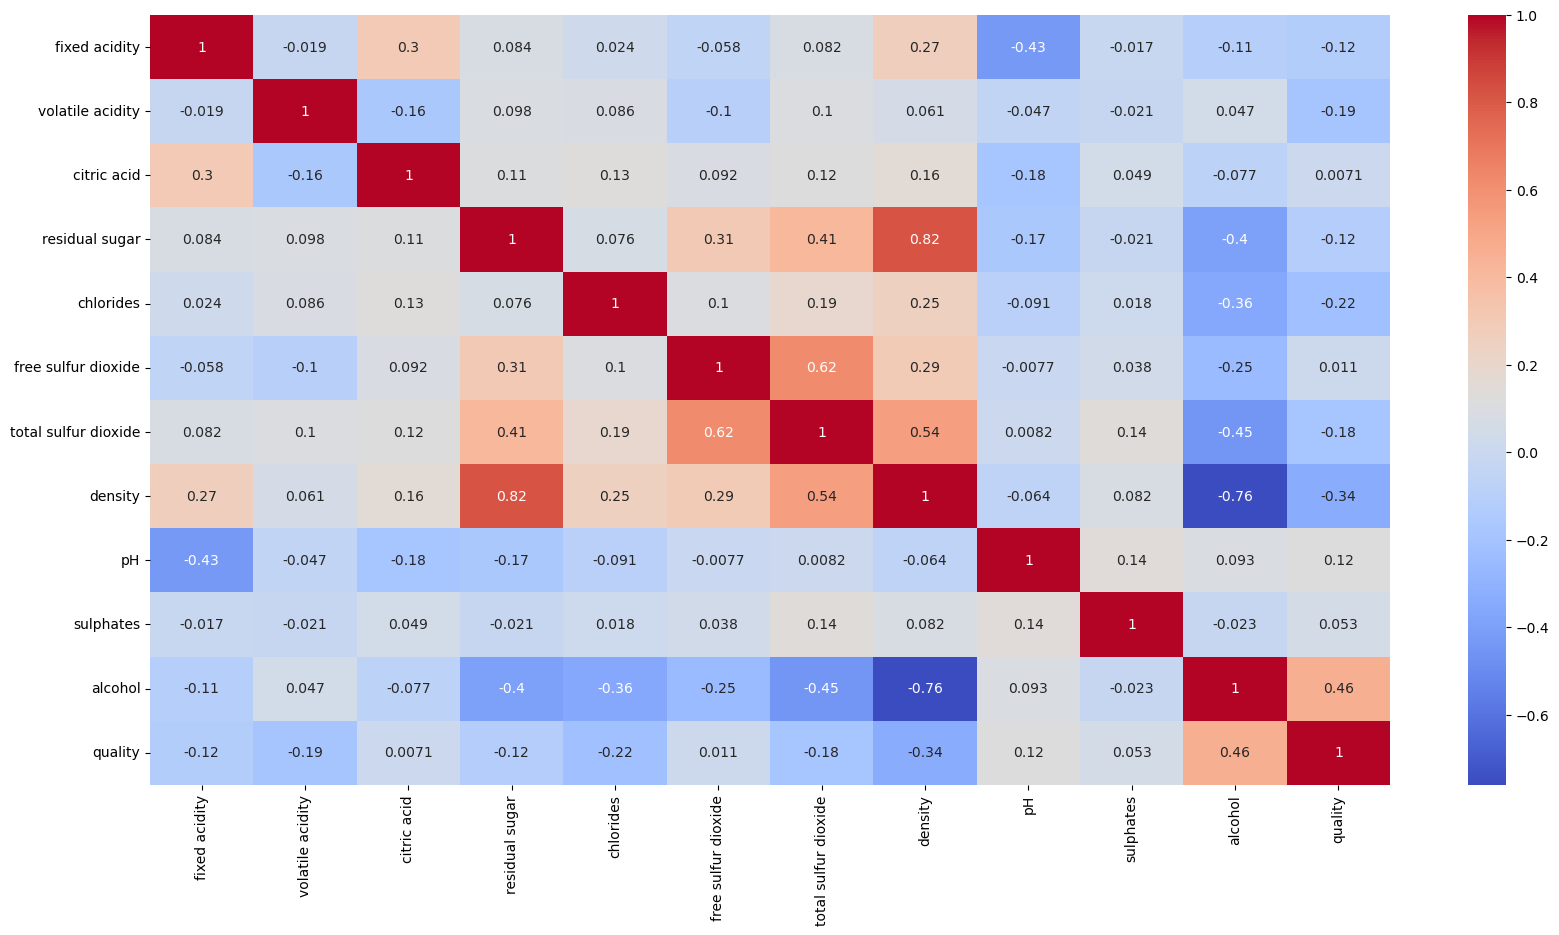

In [15]:
# Visualization of coorelation Matrix
corr=df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True,cmap='coolwarm')

# Divide the Dataframe into Dependent and Independent Variables 

In [16]:
# Create seperate objects for TARGET & INPUT features
target_name='quality'
# Seperate Object for target features
y=df[target_name]
# Seperate Object for Input features
x=df.drop(target_name,axis=1)  # 1 for column , and 0 for row ) 

In [17]:
x.head()    # x for remaining rows except quaity column

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6


In [18]:
x.shape    # x for remaining rows except quaity column

(3961, 11)

In [19]:

y.head()   # y represents only quaity column

0    6
1    6
2    6
3    6
6    6
Name: quality, dtype: int64

In [20]:
y.shape     # y represents only quaity column

(3961,)

# Feature Scaling 

In [21]:
# Standard Scaling 
from sklearn .preprocessing import StandardScaler

sc=StandardScaler()
x_res=sc.fit_transform(x)

In [22]:
x1=x.drop(['residual sugar','density'],axis=1)
x1.shape

(3961, 9)

In [23]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
scalar.fit(x1)
rescaledx=scalar.transform(x1)

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(rescaledx,y,test_size=0.2,random_state=7)

In [25]:
x_train.shape,y_train.shape

((3168, 9), (3168,))

In [26]:
x_test.shape,y_test.shape

((793, 9), (793,))

# Modelling

In [27]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

dt_train_pred=dt.predict(x_train)
dt_test_pred=dt.predict(x_test)

In [28]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [29]:
print(' Train Accuarcy : ', accuracy_score(y_train,dt_train_pred)*100)

 Train Accuarcy :  100.0


In [32]:
print( " Accuracy Score : ", accuracy_score(y_test,dt_test_pred)*100)

 Accuracy Score :  41.992433795712486


In [33]:
print("Confussion Matrix : ")
print(confusion_matrix(y_test,dt_test_pred))

Confussion Matrix : 
[[  0   0   2   3   1   0   0]
 [  0   6  17   6   3   0   0]
 [  4  11 113  95  22   2   0]
 [  1  11  92 170  59  12   0]
 [  0   1  10  69  39  12   0]
 [  0   0   0  13  10   5   0]
 [  0   1   0   0   2   1   0]]


In [34]:
print(" Classification report : ")
print(classification_report(y_test,dt_test_pred,digits=4))

 Classification report : 
              precision    recall  f1-score   support

           3     0.0000    0.0000    0.0000         6
           4     0.2000    0.1875    0.1935        32
           5     0.4829    0.4575    0.4699       247
           6     0.4775    0.4928    0.4850       345
           7     0.2868    0.2977    0.2921       131
           8     0.1562    0.1786    0.1667        28
           9     0.0000    0.0000    0.0000         4

    accuracy                         0.4199       793
   macro avg     0.2291    0.2306    0.2296       793
weighted avg     0.4191    0.4199    0.4193       793



C:\Users\udayk\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\udayk\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\udayk\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
